![display relevant image here](path/url/to/image)
- Banner/header image

# Analysis of Loan Data: Optimizing Loan Approvals Using Predictive Models


## Overview
- BLUF (Bottom Line Up Front)

Creating a predictive model for loan approavls using the "financial_loan_data" dataset has revealed that RiskScore and DTI are the strongest predictors of a customer defaulting on thier loan, with each loan carrying a cost of $50,000/defaulted loan. The XGBoost model preformed excellently with an AUC of 0.9998 which indicates a mimimal risk of false positive approvals or missed opportunities (each costing $8,000). RiskScore is very dominant and as such one business reccomendation would be to audit the RiskScore calculation (check to see how important this is, how it is calculated, etc). Additionally, as DTI is important (second most important feature) a reccomendation would be to offer debt management incentives (such as closing cost credits or interest rate credits). Lastly, as self employment offers risk, I would suggest creating more stringent lending requirements for self employmed borrowers.

With RiskScore included, the model performs exceptionally well! It achieves a near perfect recall, F1, and AUC. This means that, as stated, it is a highly influential predictor in loan approvals. However, without RiskScore, the model's performance declines substantially, with recall dropping from 0.99 to 0.6155 and F1 score from 0.99 to 0.6731. AUC also dropped from 0.9998 to 0.9086, which while still strong again shows how dominant RiskScore is in the model.

UPDATED AFTER Re-Training without RiskScore(I am doing this so you see my thought process)
I re-tested the model removing RiskScore and including TotalAssets and MonthlyIncome. There was some improvement from the initial drop off!
Recall without RiskScore: 0.7434
F1 Score without RiskScore: 0.7718
AUC without RiskScore: 0.9521

This indicates that they are valuable predictors; likely grabbing some financial data that RiskScore was capturing to make predictions.

The best preforming model without RiskScore became the Logistic Regression Model as it provides strong recall, high AUC, and a very competitive cost:

Logistic Regression - Recall: 0.7384
Logistic Regression - F1 Score: 0.7847
Logistic Regression - AUC: 0.9599
Total Cost: $9454000

Based on the dataset and analysis conducted below, it is clear that RiskScore is the key driver of the models performance. However, I do not have specific information into how it is calculated to determine if it includes data leakage or bias. As such, I would proceed with caution with regards to using RiskScore as it may artificially inflate model performance. I would need to find out more information into how it is calculated to determine how to best proceed. 

- One paragraph summary of final model performance and business implications

My final classificaiton model before re-testing without RiskScore (best_xgb), had exceptional performance with an AUC of 0.9998 as well as very high recall and f1 scores. This means the model is quite effective at finding high AND low risk applicants which helps to minimize missed opportunities and potential defaulted loans. I do have some concern about the weight that RiskScore carries, but from a business perspective this model does a great job. My reccomendations (again), are to audit RiskScore and see its true impact, offer incentives for lower DTIs, and have stricter guidelines for self employed borrowers. The XGBoost model (best_xgb) has far and away the lowest cost potentially cost associated with it due to the lowest number of false positive and false negatives.

Cost per model with RiskScore included:
Logistic Regression Total Cost: $1,766,000
Decision Tree Total Cost: $1,352,000
Random Forest Total Cost: $1,190,000
XGBoost Total Cost: $606,000 ***
SVC Total Cost: $1,540,000

If we decide that we cannot use RiskScore (due to data leakage or other bias), the logistic regrssion model is best with a recall of 0.7414, f1 score of 0.7862, and AUC of 0.9614 (which is acutally pretty good). The decision boils down to whether or not we can use RiskScore as an accurate feature for our model as the financial benefit of using it is quite strong (just a potential cost of $606,000 vs $9,340,000-$9,428,000).

Cost Per Model Without RiskScore:

SVC No Risk Total Cost: $9,340,000 ***

Random Forest No Riskk Total Cost: $9,812,000

DT No Risk Total Cost: $17,834,000

Logistic Regression No risk Total Cost: $9,428,000

XGBoost No Risk Total Cost: $11,388,000

Interestingly, due to the lower number of false positives, the SVC model is the most cost efficient! SVC($9,340,000 vs $9,428,000). The question is if the better performing model is more important to stakeholders. I would present both options stating that while the Logistic Regression model is the best performing model, the SVC model has slightly better cost effectiveness associated with it. 

- Frame your 'story'

FinTech Innovations is seeking to optimize its loan approval process in an effort to minimize the risk of loan defaults (which have a cost of $50,000 per loan).

By developing a classification model to help with automation of loan decisions, we are able to focus on mimizing defaulted loans and missed profitable loans ($8,000/ per loan missed).

We found that RiskScore is a highly influential feature that impacts whether or not the model would approve a loan. TotalDebtToIncomeRatio also acts as a major indicator. This lines up with my real world experience as a loan officer. Additionally, it appears as if self employment (ie. a self employed borrower) represents additional risk.

As such, I reccommend that FinTech Innovations take a deep look into RiskScore's calculation to ensure there is no bias, offer debt reduction incentives (ie. if your DTI is below 30% you get $XXX towards closing), and try to develop more stringent self employment guidelines to ensure risk minimization. 

## Business Understanding

1. Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:
- Describes the current manual process and its limitations

Let me start by saying that I find this lab amusing. For the past 5-6 years I have been a loan officer so this really hits at home. Currently, the loan approval process is done by an LO. From my personal experience, I can say that this can be (at times) difficult, take a lot of time, and not mistake free. When we are approving, there is also a level of subjectiveness. Do I see a lot of money in the bank? If so, I am likely to be more lenient with my approval as reserves are helpful. To summarize, the current process is subject to human error, human judgement, and takes more time.

- Identifies key stakeholders and their needs

Loan officer: a good model would help with more effective evaluation of loan applications
Management: a good model would help minimze losses from loans that default which leads to higher profitability
Customers: They get their approvals quickly and without bias. For example, one of the major concerns for investors is redlining. This is a discrimenation based potentially on race, ethnicity, and neighborhoods. 

- Explains the implications of different types of model errors

False positive: a false positive in the case of the model would be approving a bad loan. Each defaulted loan is at a cost of $50,000. That one loan that defaults would lose 6 good loans (6 * 8000= 48,000) as a defaulted loan costs $50,000. So, if a model approved 5 bad loans, we are suddenly $250,000 down.
False negative: a false negative in this case would be denying a loan of a credit worthy applicant. Each false negative would lead to an $8,000 loss.

- Justifies your choice between classification and regression approaches

Classification: this would directly predict loan approval status (approved (1)/ denied (0)). This aligns with the business goal of reducing defaults

Regression: this would likely predict a risk score or chance ofo default. This would be a more nuanced approach.
Given the fact that the main concern here is preventing false positives (which are expensive!), a classification approach would be best.

**The goal here is to create a classification model that can predict if a customer should be approved or denied (binary)

2. Define your modeling goals and success criteria:
- Select appropriate evaluation metrics based on business impact

F1 Score: this is a good balance between precision and recall
Recall: given the importance of weeding out customers that have a high likelihood of defaulting, this is critical

- You must use at least two different metrics

F1 score and recall

- Consider creating custom metric

Custom metric that looks at the 50k cost of a false positive and the 8k loss of a false negative. My custom metric will be "total cost". total cost = (number false positives * 50,000) +(number false negatives * 8,000)/ total number of loans.

- Establish baseline performance targets

To start lets go with a recall >= 0.75 and f1 >= 0.75

- Document your reasoning for each choice

Recall is probably the most important metrics given the cost of false negatives. As such, we want this to be awfully accurate.

F1 Score is also important as it is a good balance between precision and recall. A score in the range of 0.75 or better would help with overfitting as we need to minimize false positives and negatives.

## Data Understanding
3. Conduct comprehensive exploratory data analysis:
- Describe basic data characteristics
- Examine distributions of all features and target variables
- Investigate relationships between features
- Create visualizations to help aid in EDA
- Document potential data quality issues and their implications

4. Develop feature understanding:
- Categorize features by type (numerical, categorical, ordinal)
- Identify features requiring special preprocessing
- Document missing value patterns and their potential meanings
- Note potential feature engineering opportunities


In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, message=".*use_label_encoder*") #asked llm to make warnings go away for sake of reading/analysis

loan_data = pd.read_csv('financial_loan_data.csv')

In [3]:
# EDA Code Here - Create New Cells As Needed

loan_data.head() #look at first few rows

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,"$39,948.00",617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,"$39,709.00",628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,"$40,724.00",570,Employed,Bachelor,26,17627,36,NaN,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,"$69,084.00",545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,"$103,264.00",594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
#check data types
loan_data.info()

print(loan_data['TotalAssets'].head())
print(loan_data['TotalAssets'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  object 
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              19099 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               18669 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [5]:
#check null values
loan_data.isnull().sum()
#these missing values are not relevant to my model/anaylsis

Age                              0
AnnualIncome                     0
CreditScore                      0
EmploymentStatus                 0
EducationLevel                 901
Experience                       0
LoanAmount                       0
LoanDuration                     0
MaritalStatus                 1331
NumberOfDependents               0
HomeOwnershipStatus              0
MonthlyDebtPayments              0
CreditCardUtilizationRate        0
NumberOfOpenCreditLines          0
NumberOfCreditInquiries          0
DebtToIncomeRatio                0
BankruptcyHistory                0
LoanPurpose                      0
PreviousLoanDefaults             0
PaymentHistory                   0
LengthOfCreditHistory            0
SavingsAccountBalance          572
CheckingAccountBalance           0
TotalAssets                      0
TotalLiabilities                 0
MonthlyIncome                    0
UtilityBillsPaymentHistory       0
JobTenure                        0
NetWorth            

In [6]:
#basic stats
loan_data.describe()

,Age,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


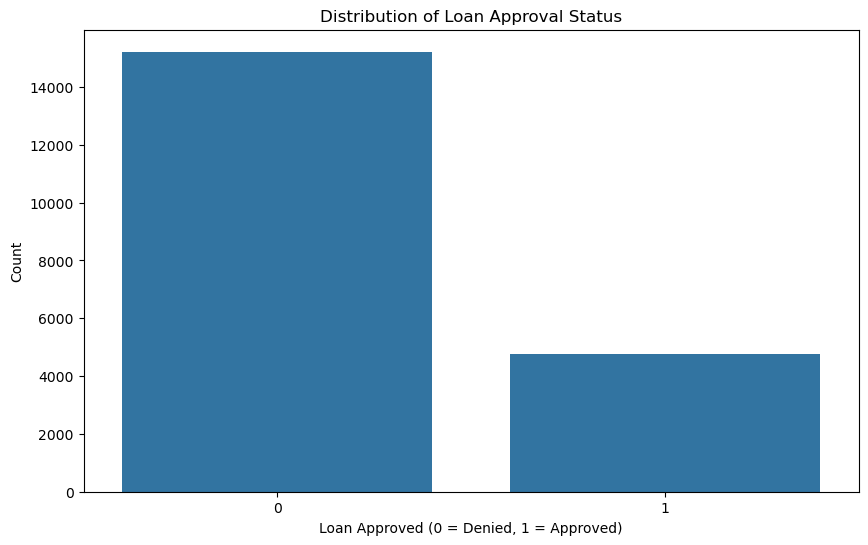

In [7]:
#target variable is 'LoanApproved'

# Get counts of LoanApproved
loan_approval_counts = loan_data['LoanApproved'].value_counts()

# Extract index and values
X = loan_approval_counts.index
y = loan_approval_counts.values

# Plot using barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=X, y=y)
plt.xlabel('Loan Approved (0 = Denied, 1 = Approved)')
plt.ylabel('Count')
plt.title("Distribution of Loan Approval Status")
plt.show()


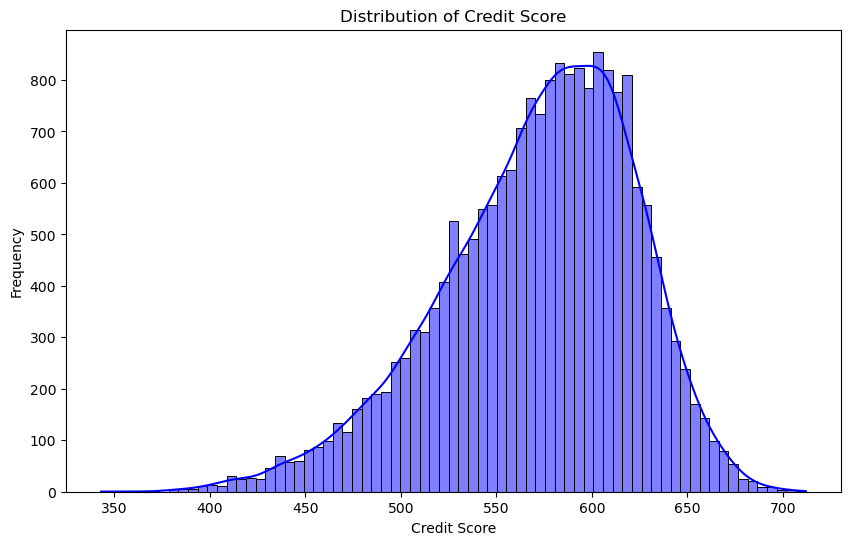

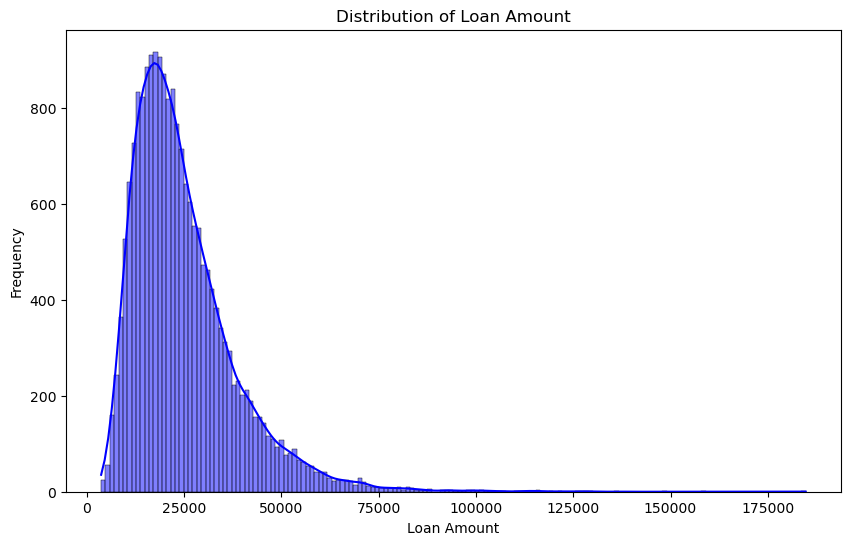

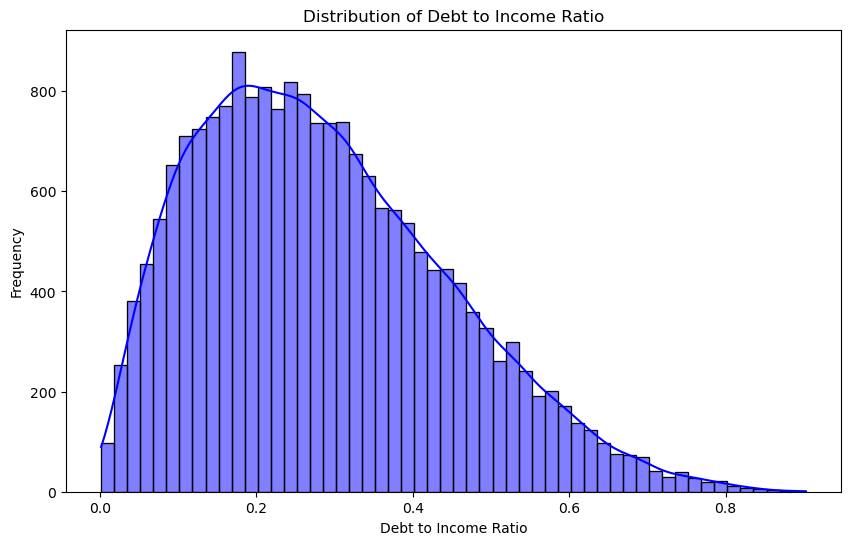

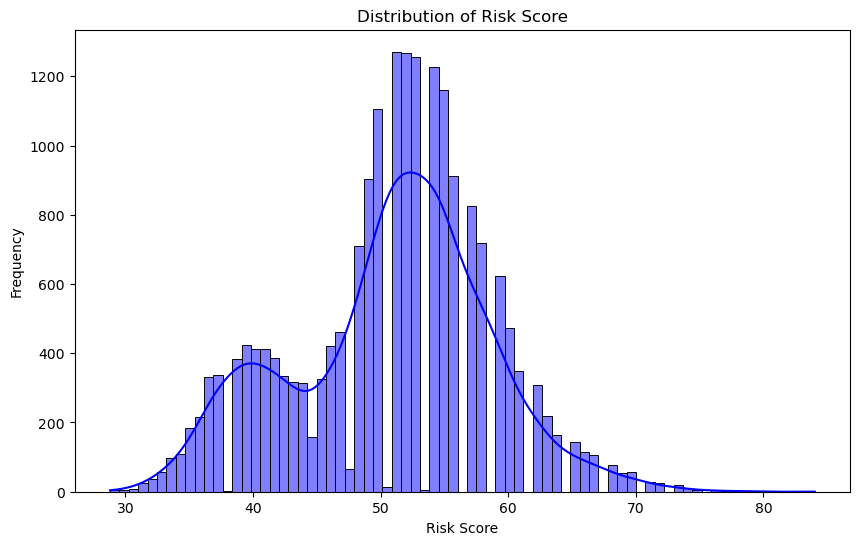

In [8]:
#Going to look at CreditScore, LoanAmount, DebtToIncomeRatio, and RiskScore subplots?

# Plot CreditScore Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['CreditScore'], kde=True, color='blue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Plot LoanAmount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['LoanAmount'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot DebtToIncomeRatio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['DebtToIncomeRatio'], kde=True, color='blue')
plt.title('Distribution of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Plot RiskScore Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['RiskScore'], kde=True, color='blue')
plt.title('Distribution of Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


In [9]:
#correlation matrix
selected_features = ['CreditScore', 'LoanAmount', 'DebtToIncomeRatio', 'RiskScore', 'LoanApproved']

correlations = loan_data[selected_features].corr()['LoanApproved'].sort_values(ascending=False)
correlations

#VERY WEIRD! Debt to income ratio is usually a key indicator of a loan approval. Going to test TotalDebtToIncomeRatio

LoanApproved         1.000000
CreditScore          0.142000
DebtToIncomeRatio    0.000034
LoanAmount          -0.239496
RiskScore           -0.766137
Name: LoanApproved, dtype: float64

In [10]:
selected_features_two = ['CreditScore', 'LoanAmount', 'TotalDebtToIncomeRatio', 'RiskScore', 'LoanApproved']

correlations_two = loan_data[selected_features_two].corr()['LoanApproved'].sort_values(ascending=False)
correlations_two

#RiskScore: most strongly correlated... higher risk score low approval rate
#TotaDebtToIncomeRatio: Now this makes more sense! As expected, a higher DTI shows a lower liklihood of approval
#LoanAmount: small correlation... higher loan amounts are less likely to be approved which makes sense because of income variance etc.
#CreditScore small positive correlation. Not a real indicator though. In my experiencen I was able to approve loans with credit scores as low as 510 (though harder to find a fit), so this makes sense as well.

LoanApproved              1.000000
CreditScore               0.142000
LoanAmount               -0.239496
TotalDebtToIncomeRatio   -0.410399
RiskScore                -0.766137
Name: LoanApproved, dtype: float64

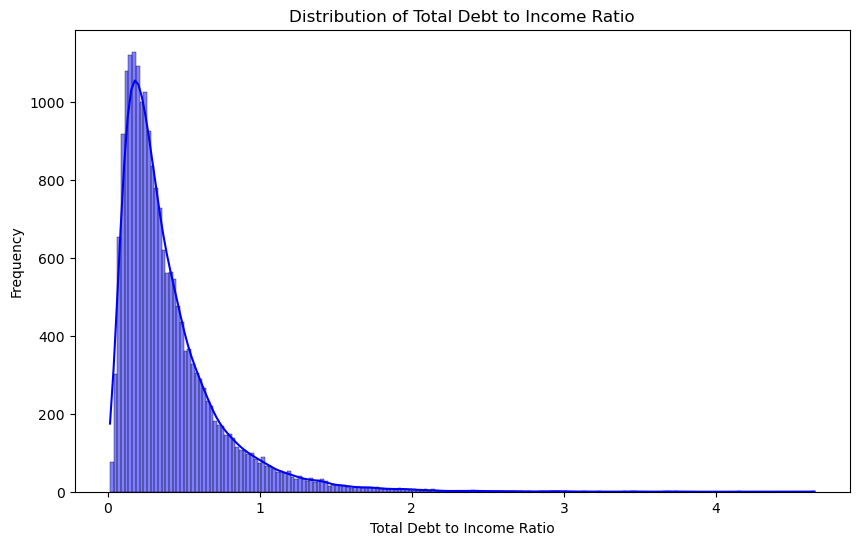

In [11]:
#plotting TotalDebtToIncomeRatio

plt.figure(figsize=(10, 6))
sns.histplot(loan_data['TotalDebtToIncomeRatio'], kde=True, color='blue')
plt.title('Distribution of Total Debt to Income Ratio')
plt.xlabel('Total Debt to Income Ratio')
plt.ylabel('Frequency')
plt.show()


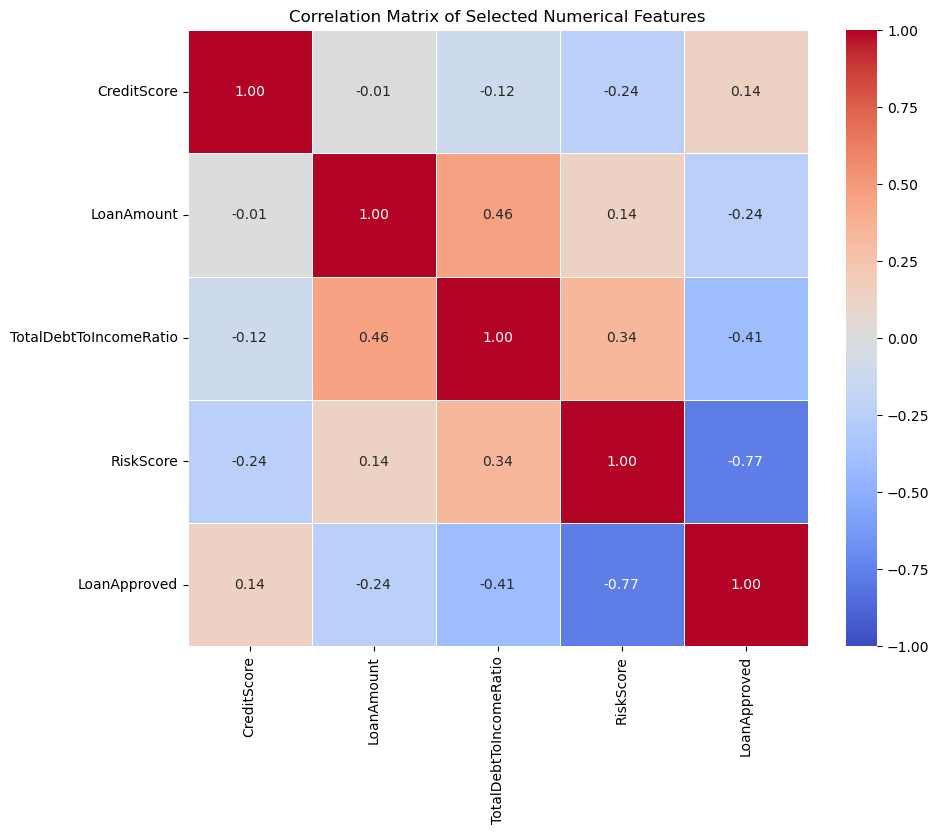

In [12]:
selected_features_two = ['CreditScore', 'LoanAmount', 'TotalDebtToIncomeRatio', 'RiskScore', 'LoanApproved']

plt.figure(figsize=(10, 8))
correlation_matrix = loan_data[selected_features_two].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Features')
plt.show()

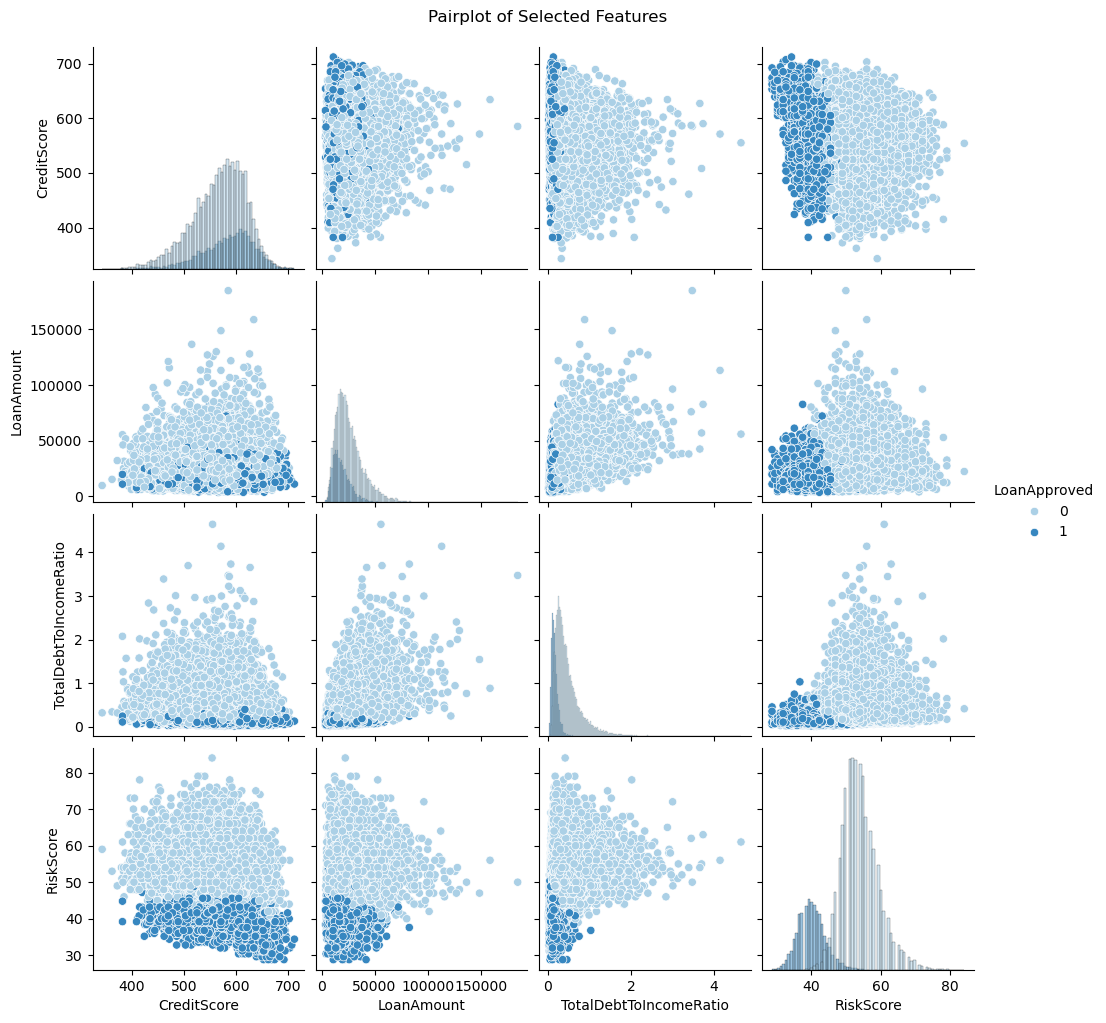

In [13]:
#AI prompt: Can you help me generate a pairplot for my selected features: selected_features_two = ['CreditScore', 'LoanAmount', 'TotalDebtToIncomeRatio', 'RiskScore', 'LoanApproved'] 
#output:
sns.pairplot(loan_data[selected_features_two], hue='LoanApproved', palette='Blues', diag_kind='hist')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [14]:
#AI prompt: In my dataset, 'AnnualIncome' is shown as, for example, $30,000. My dataset is called loan_data. I need to remove the $ and comma to make this a float. Can you tell me the code to convert it? 
#output:
# Remove dollar signs and commas, then convert to float
loan_data['AnnualIncome'] = loan_data['AnnualIncome'].str.replace('[\$,]', '', regex=True).astype(float)
# Verify the conversion
print(loan_data['AnnualIncome'].head())
print("Data Type of AnnualIncome:", loan_data['AnnualIncome'].dtype)

#coming back... decided not to use annualincome

0     39948.0
1     39709.0
2     40724.0
3     69084.0
4    103264.0
Name: AnnualIncome, dtype: float64
Data Type of AnnualIncome: float64


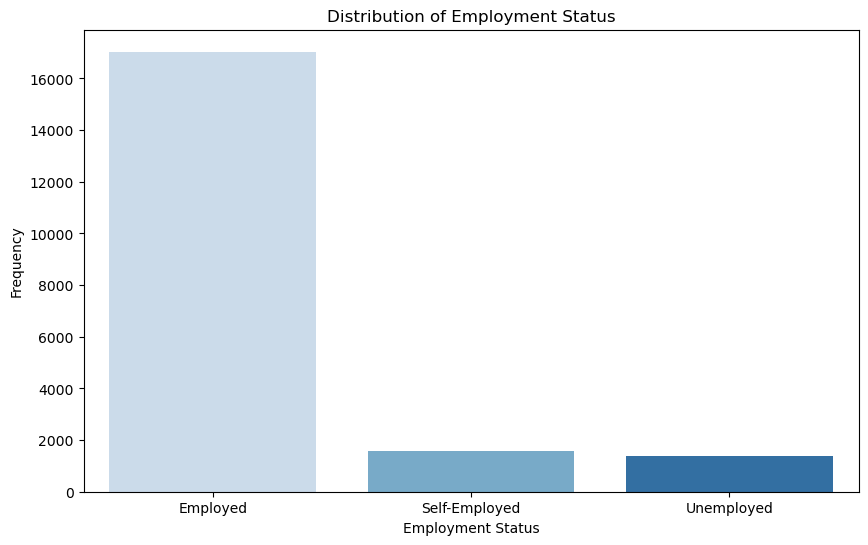

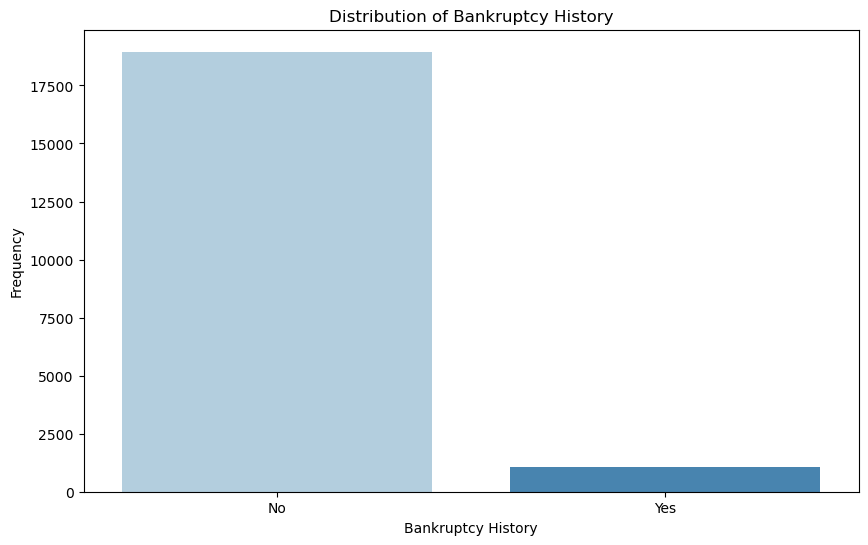

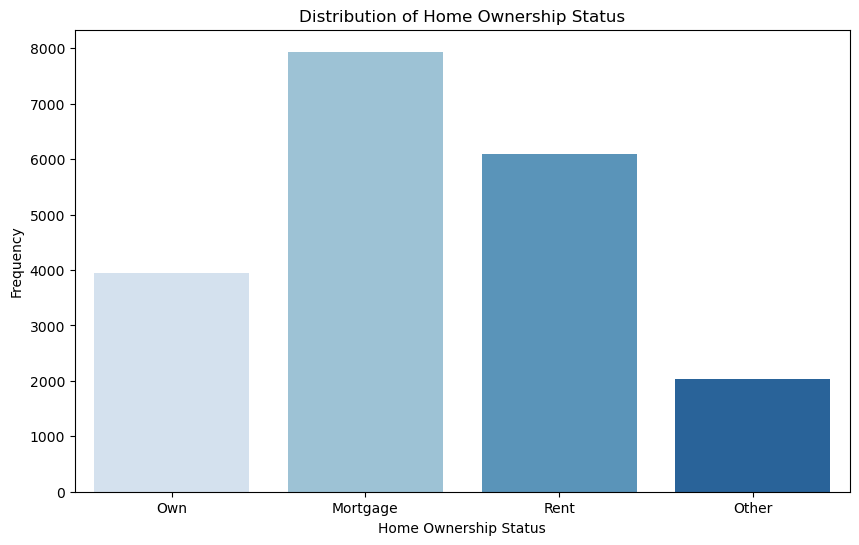

In [15]:
#categorical variables using EmploymentStatus, BankruptcyHistory, and HomeOwnershipStatus

# employmentstatus
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentStatus', data=loan_data, palette='Blues')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.show()

#bankruptcy
plt.figure(figsize=(10, 6))
sns.countplot(x='BankruptcyHistory', data=loan_data, palette='Blues')
plt.title('Distribution of Bankruptcy History')
plt.xlabel('Bankruptcy History')
plt.ylabel('Frequency')
plt.show()

# homeownership
plt.figure(figsize=(10, 6))
sns.countplot(x='HomeOwnershipStatus', data=loan_data, palette='Blues')
plt.title('Distribution of Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Frequency')
plt.show()


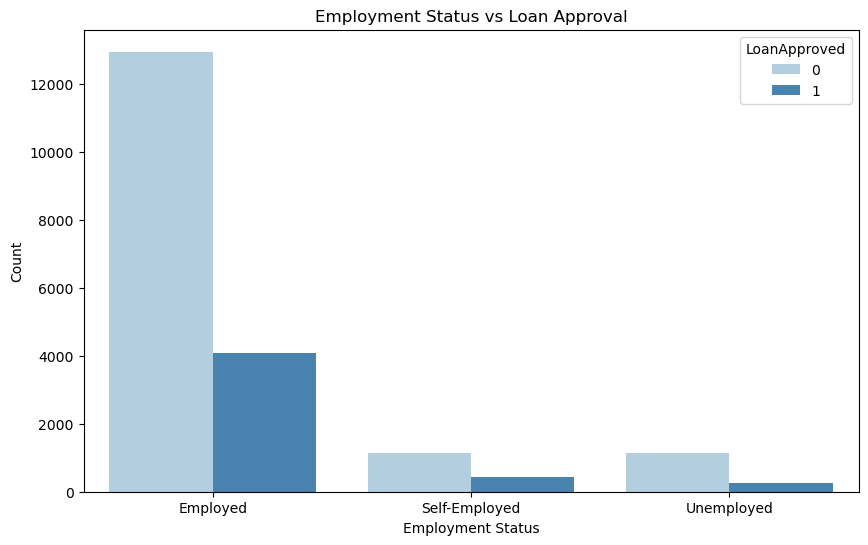

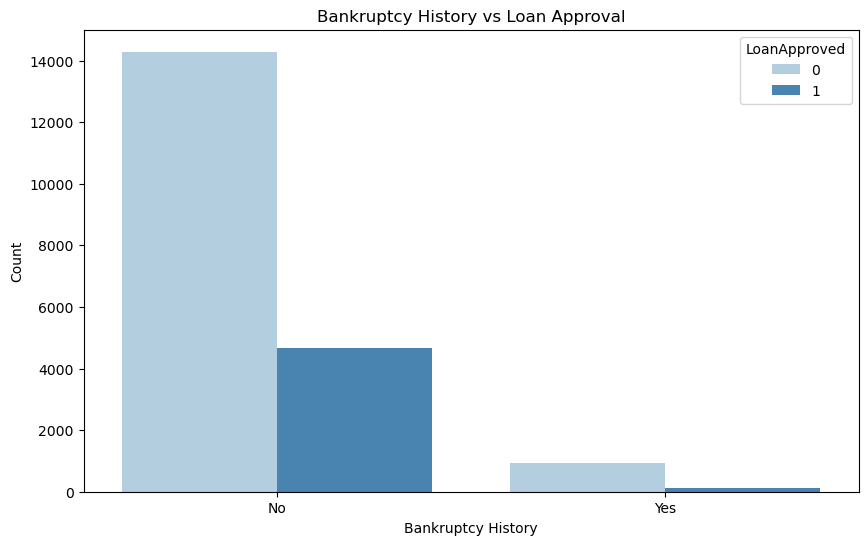

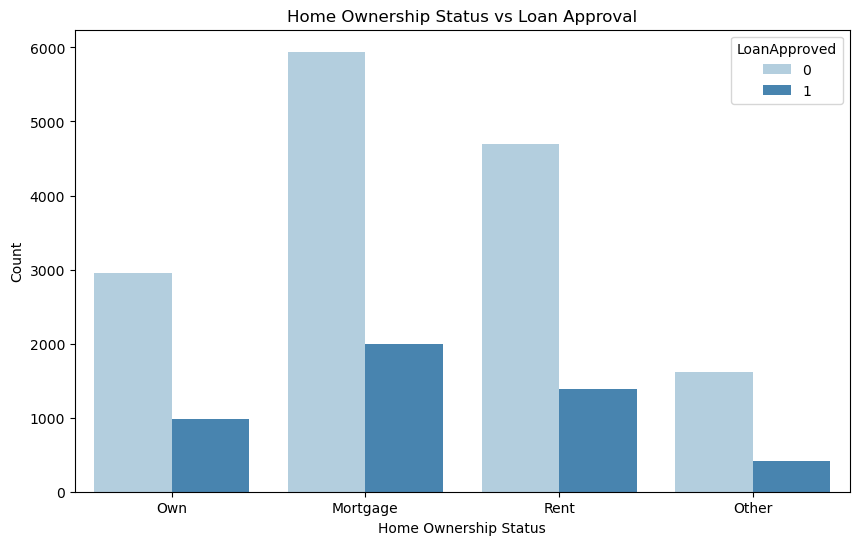

In [16]:
#comparing to loan approved

#employment status vs LoanApproved
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentStatus', hue='LoanApproved', data=loan_data, palette='Blues')
plt.title('Employment Status vs Loan Approval')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

# bankruptcy vs LoanApproved
plt.figure(figsize=(10, 6))
sns.countplot(x='BankruptcyHistory', hue='LoanApproved', data=loan_data, palette='Blues')
plt.title('Bankruptcy History vs Loan Approval')
plt.xlabel('Bankruptcy History')
plt.ylabel('Count')
plt.show()

# homeownership vs LoanApproved
plt.figure(figsize=(10, 6))
sns.countplot(x='HomeOwnershipStatus', hue='LoanApproved', data=loan_data, palette='Blues')
plt.title('Home Ownership Status vs Loan Approval')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')

plt.show()


## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



In [17]:
# Data Prep Code Here - Create New Cells As Needed
#start with features as a list split by numeric and categorical
numeric_features = ['CreditScore', 'LoanAmount', 'TotalDebtToIncomeRatio', 'RiskScore', 'SavingsAccountBalance'] #added columns that needed cleaning
categorical_features = ['EmploymentStatus', 'BankruptcyHistory', 'HomeOwnershipStatus', 'EducationLevel', 'MaritalStatus'] #added columns that needed cleaning

# Numeric Transformer Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing with median
    ('scaler', StandardScaler()) #scales numbers so datapoints are balanced
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill with most common value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # One-hot encode... changes our variables to binary
])

# Combine Preprocessing Steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ColumnTransformer applies separate pipelines to numeric and categorical features.
#This approach maintains data structure integrity while allowing customized processing for each feature type.


## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

    Logistic Regression: I used this model because it is a strong baseline model. Logistic regression is good because it is very simple and interpretable. 
    Decision Tree: This has the potential to get non-linear relationshpis that logistic regression might miss (it may overfit due to depth)
    Random Forest: This combines multiple decision trees helping to reduce overfitting and improve on generaliation.
    SVC: this has the ability to see complex patterns which might have been missed by other models. This is  good at achieving high recall, which is important for the business objectives
    XGB: this is a boosting algorithm. I want to see how it handles complex patterns as well as focusing on recall (which is imporant for business objectives as stated above)

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

I found the best configuration (below) to be learning_rate=0.1, max_depth=3, n_estimators=300. Keeping max_depth low (at 3 vs 5 or 7) helps keep the model maintain simplicity. As I increase the number of estimators, recall would improve, but the time it takes to train the model is longer. 300 was the highest number of my parameters. increasing learning rate can lead to overfitting, but in this case, 0.1 appeared to be a good balanced number.

NOTE: Be mindful of time considerations - showcase “how to tune” 


In [18]:
#  Modeling Code Here - Create New Cells as Needed
#logistic regression
#decision tree
#random forest
#XGBoost
#SVC

# Define target variable and features
X = loan_data[numeric_features + categorical_features]
y = loan_data['LoanApproved']  # Target column

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#had a lot of back and forth with chatgpt. my preprocessor was not flowing through to the model. had to input the below
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [19]:
#logistic regression
# Instantiate and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_processed, y_train)

# Predict
y_pred = log_model.predict(X_test_processed)
y_pred_proba = log_model.predict_proba(X_test_processed)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Log Confusion Matrix:\n", cm)

#encountered an error that my chosen variables are not passing through. had to go back and change my X value to loan_data[numeric_features + categorical_features]

# Recall
log_cv_recall = cross_val_score(log_model, X_train_processed, y_train, cv=5, scoring='recall')
print(f"Logistic Regression - Recall: {log_cv_recall.mean():.4f}")

# F1 Score
log_cv_f1 = cross_val_score(log_model, X_train_processed, y_train, cv=5, scoring='f1')
print(f"Logistic Regression - F1 Score: {log_cv_f1.mean():.4f}")


Log Confusion Matrix:
 [[2952   31]
 [  27  990]]
Logistic Regression - Recall: 0.9609
Logistic Regression - F1 Score: 0.9645


In [20]:
#total cost log
# Business costs
cost_fp_log = 31 * 50000  # Cost of false positives
cost_fn_log = 27 * 8000    # Cost of false negatives

# Total cost
total_cost = cost_fp_log + cost_fn_log

print(f"Total Cost: ${total_cost}")


Total Cost: $1766000


In [21]:
#Decision Tree
# Instantiate the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train_processed, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_processed)
y_pred_proba_dt = dt_model.predict_proba(X_test_processed)[:, 1]

#confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("DT Confusion Matrix:\n", cm_dt)

dt_cv_recall = cross_val_score(dt_model, X_train_processed, y_train, cv=5, scoring='recall')
print(f"Decision Tree - Recall: {dt_cv_recall.mean():.4f}")

# F1 Score
dt_cv_f1 = cross_val_score(dt_model, X_train_processed, y_train, cv=5, scoring='f1')
print(f"Decision Tree - F1 Score: {dt_cv_f1.mean():.4f}")

DT Confusion Matrix:
 [[2959   24]
 [  19  998]]
Decision Tree - Recall: 0.9665
Decision Tree - F1 Score: 0.9677


In [22]:
#total cost decision tree
# Business costs
cost_fp_dt = 24 * 50000  # Cost of false positives
cost_fn_dt = 19 * 8000    # Cost of false negatives

# Total cost
total_cost = cost_fp_dt + cost_fn_dt

print(f"Total Cost: ${total_cost}")


Total Cost: $1352000


In [23]:
#random forest
# Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train_processed, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_processed)
y_pred_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]

#confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("RF Confusion Matrix:\n", cm_rf)

# Recall
rf_cv_recall = cross_val_score(rf_model, X_train_processed, y_train, cv=5, scoring='recall')
print(f"Random Forest - Recall: {rf_cv_recall.mean():.4f}")

# F1 Score
rf_cv_f1 = cross_val_score(rf_model, X_train_processed, y_train, cv=5, scoring='f1')
print(f"Random Forest - F1 Score: {rf_cv_f1.mean():.4f}")


RF Confusion Matrix:
 [[2964   19]
 [  30  987]]
Random Forest - Recall: 0.9604
Random Forest - F1 Score: 0.9673


In [24]:
#total cost random forest
# Business costs
cost_fp_rf = 19 * 50000  # Cost of false positives
cost_fn_rf = 30 * 8000    # Cost of false negatives

# Total cost
total_cost = cost_fp_rf + cost_fn_rf

print(f"Total Cost: ${total_cost}")

Total Cost: $1190000


In [25]:
#XGBoost
# Instantiate the model
xgb_model = XGBClassifier(eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train_processed, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_processed)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_processed)[:, 1]

# Evaluate Metrics
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

#confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_xgb)
print("XGB Confusion Matrix:\n", cm_rf)

# Recall
xgb_cv_recall = cross_val_score(xgb_model, X_train_processed, y_train, cv=5, scoring='recall')
print(f"XGBoost - Recall: {xgb_cv_recall.mean():.4f}")

# F1 Score
xgb_cv_f1 = cross_val_score(xgb_model, X_train_processed, y_train, cv=5, scoring='f1')
print(f"XGBoost - F1 Score: {xgb_cv_f1.mean():.4f}")

XGB Confusion Matrix:
 [[2972   11]
 [   7 1010]]
XGBoost - Recall: 0.9827
XGBoost - F1 Score: 0.9839


In [26]:
#total cost xgb
# Business costs
cost_fp_xgb = 11 * 50000  # Cost of false positives
cost_fn_xgb = 7 * 8000    # Cost of false negatives

# Total cost
total_cost = cost_fp_xgb + cost_fn_xgb

print(f"Total Cost: ${total_cost}")

Total Cost: $606000


In [27]:
#SVC
# Instantiate the model with probability=True for AUC-ROC
svc_model = SVC(probability=True)

# Fit the model
svc_model.fit(X_train_processed, y_train)

# Predict
y_pred_svc = svc_model.predict(X_test_processed)
y_pred_proba_svc = svc_model.predict_proba(X_test_processed)[:, 1]

# Evaluate Metrics
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

#confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_svc)
print("SVC Confusion Matrix:\n", cm_rf)

svc_cv_recall = cross_val_score(svc_model, X_train_processed, y_train, cv=5, scoring='recall')
print(f"SVC - Recall: {svc_cv_recall.mean():.4f}")

# F1 Score
svc_cv_f1 = cross_val_score(svc_model, X_train_processed, y_train, cv=5, scoring='f1')
print(f"SVC - F1 Score: {svc_cv_f1.mean():.4f}")

SVC Confusion Matrix:
 [[2957   26]
 [  30  987]]
SVC - Recall: 0.9585
SVC - F1 Score: 0.9659


In [28]:
#total cost svc
# Business costs
cost_fp_svc = 26 * 50000  # Cost of false positives
cost_fn_svc = 30 * 8000    # Cost of false negatives

# Total cost
total_cost = cost_fp_svc + cost_fn_svc

print(f"Total Cost: ${total_cost}")

Total Cost: $1540000


In [29]:
#model optimization... XGB best model based on total cost, recall, and f1

# More estimators means longer time needed to train
param_grid = {'n_estimators': [100, 200, 300],
'learning_rate': [0.01, 0.05, 0.1],
'max_depth': [3, 5, 7]}

# Instanstiate GridSearch and select metric to score
grid_search = GridSearchCV(xgb_model, 
                           param_grid, 
cv=5, 
scoring='recall', 
n_jobs=-1)

# Fit model to train
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [33]:
# Evaluate GS results
print("Best parameters from grid search:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")
print(f"Best Recall Score: {grid_search.best_score_:.4f}")

Best parameters from grid search:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best cross-validation score: 0.9835
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Recall Score: 0.9835


In [34]:
# Access parameter combinations and their recall scores

#asked chatgpt prompt: what is the easiest way to see a list of all the different parameter combos and their recall. How do I code it after doing a gridsearch
param_results = grid_search.cv_results_

# Extract key metrics
for mean_score, params in zip(param_results['mean_test_score'], param_results['params']):
    print(f"Parameters: {params} - Recall: {mean_score:.4f}")


Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} - Recall: 0.9288
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200} - Recall: 0.9447
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300} - Recall: 0.9562
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100} - Recall: 0.9492
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200} - Recall: 0.9641
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300} - Recall: 0.9710
Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100} - Recall: 0.9546
Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200} - Recall: 0.9694
Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300} - Recall: 0.9748
Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} - Recall: 0.9662
Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200} - Recall: 0.9732
Parameters

In [ ]:
#above cell shows all of the different combos of parameters. Considering I kept it to just 3 I am able to get an output.
#best parametesr are learning rate 0.1, max_depth 3, and n_estimators 300. Recall score 0.9835

In [35]:
# Extract best/final model
best_xgb = grid_search.best_estimator_


# Make final predictions on the test set
y_pred_final = best_xgb.predict(X_test_processed)


# Evaluate final model performance
final_recall = recall_score(y_test, y_pred_final)
print(f"Final Model recall: {final_recall:.2f}")

final_f1 = f1_score(y_test, y_pred_final)

print(f"Final Model Recall: {final_recall:.2f}")
print(f"Final Model F1 Score: {final_f1:.2f}")

# Display classification report
print("Final Model Performance Report:")
print(classification_report(y_test, y_pred_final))

# Class 0 (Denied Loans):
# Precision: 1.00 — The model is perfectly identifying denied loans.
# Recall: 1.00 — No false positives (very impressive).
#F1: 1.00 - Awesome

# Class 1 (Approved Loans):
# Precision: 0.99 — Slightly lower, indicating a few false positives.
# Recall: 0.99 — Excellent, minimizing false negatives and aligning with our objective.
#F1: 0.99- Awesome... not perfect, but awfully close
#given recall is at 0.9835, I feel that a secondary search is not necessary.

Final Model recall: 0.99
Final Model Recall: 0.99
Final Model F1 Score: 0.99
Final Model Performance Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2983
           1       0.99      0.99      0.99      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



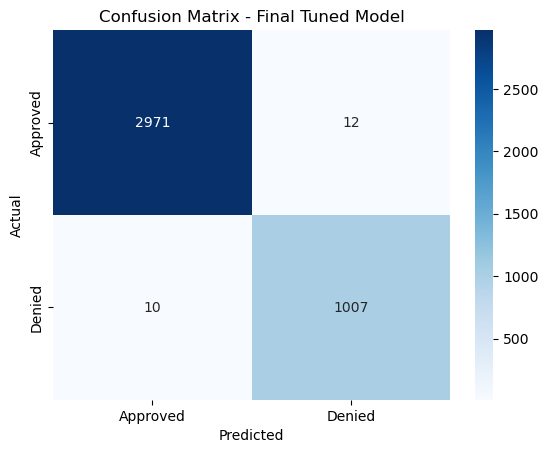

In [36]:
# Generate final confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Denied'], yticklabels=['Approved', 'Denied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Final Tuned Model')
plt.show()


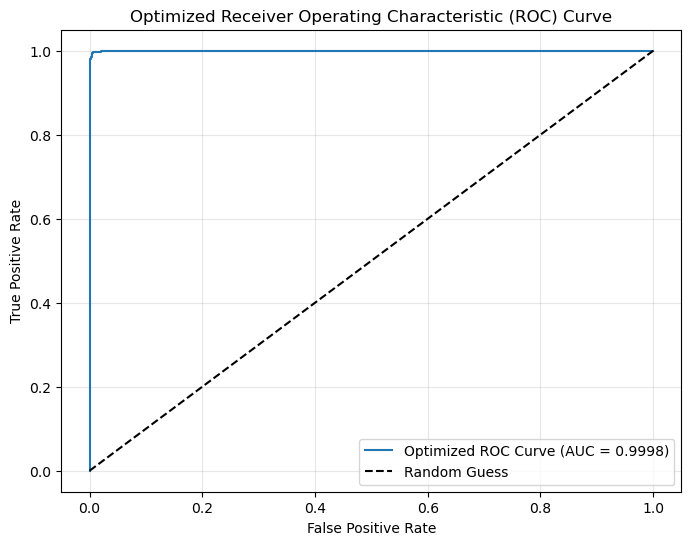

In [37]:
#ROC AUC Curve


# Get predicted probabilities for the positive class (class 1)
y_pred_proba = best_xgb.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

roc_auc
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Optimized ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#nervous that auc was showing as 1.000 so changed it to 4f to show not rounded number.

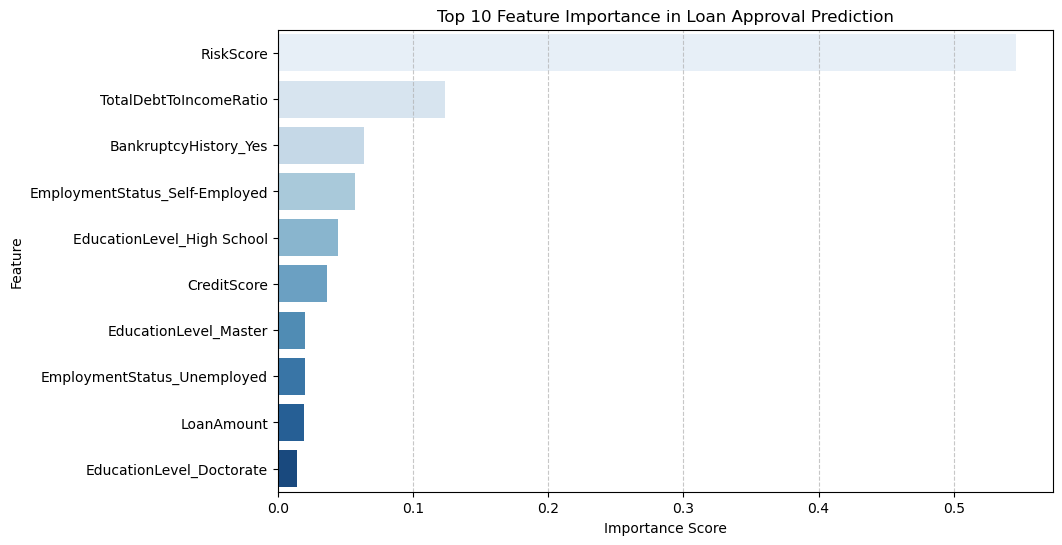

In [ ]:
#original code:
# feature_importance = pd.DataFrame({'Feature': X_train_processed.columns, 'Importance': best_xgb.feature_importances_})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# top_features = feature_importance.head(10)

# plt.figure(figsize=(10, 6))
# sns.barplot(y=top_features['Feature'], x=top_features['Importance'], palette="Blues", hue=top_features['Importance'], legend=False)
# plt.title('Top 10 Feature Importance in Customer Churn Prediction')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for readability
# plt.show()
#error i was getting:
# feature_importance = pd.DataFrame({'Feature': X_train_processed.columns, 'Importance': best_xgb.feature_importances_})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# top_features = feature_importance.head(10)

# plt.figure(figsize=(10, 6))
# sns.barplot(y=top_features['Feature'], x=top_features['Importance'], palette="Blues", hue=top_features['Importance'], legend=False)
# plt.title('Top 10 Feature Importance in Customer Churn Prediction')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for readability
# plt.show()

#copied error into ai with code. output:
# Get numeric feature names
numeric_feature_names = numeric_features

# Get categorical feature names after one-hot encoding
categorical_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': best_xgb.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_features = feature_importance.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_features['Feature'], x=top_features['Importance'], palette="Blues")
plt.title('Top 10 Feature Importance in Loan Approval Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#I am concerned about data leakage due to RiskScore being so high

In [44]:
#re-run the model without RiskScore

numeric_features_two = ['CreditScore', 'LoanAmount', 'TotalDebtToIncomeRatio', 'TotalAssets', 'MonthlyIncome']

# Second Data Split
X_two = loan_data[numeric_features_two + categorical_features]
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    X_two, loan_data['LoanApproved'], test_size=0.2, random_state=42
)

# Second Preprocessing Pipeline
preprocessor_two = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_two),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the second data split
X_train_processed_two = preprocessor_two.fit_transform(X_train_two)
X_test_processed_two = preprocessor_two.transform(X_test_two)




In [58]:
# Re-train the model without riskscore
xgb_no_risk = XGBClassifier(eval_metric='logloss')
xgb_no_risk.fit(X_train_processed_two, y_train_two)

# Predict
y_pred_no_risk = xgb_no_risk.predict(X_test_processed_two)
y_pred_proba_no_risk = xgb_no_risk.predict_proba(X_test_processed_two)[:, 1]

# Evaluate
recall_no_risk = recall_score(y_test_two, y_pred_no_risk)
f1_no_risk = f1_score(y_test, y_pred_no_risk)
auc_no_risk = roc_auc_score(y_test, y_pred_proba_no_risk)

print(f"Recall without RiskScore: {recall_no_risk:.4f}")
print(f"F1 Score without RiskScore: {f1_no_risk:.4f}")
print(f"AUC without RiskScore: {auc_no_risk:.4f}")


Recall without RiskScore: 0.7434
F1 Score without RiskScore: 0.7718
AUC without RiskScore: 0.9521


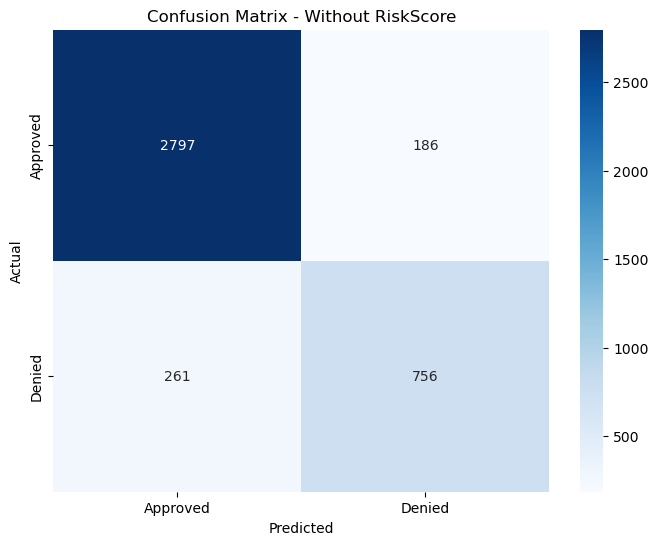

Confusion Matrix (Without RiskScore):
[[2797  186]
 [ 261  756]]
Total Cost: $11388000


In [48]:
# Generate predictions
y_pred_new = xgb_no_risk.predict(X_test_processed_two)

# Confusion matrix
cm_new = confusion_matrix(y_test_two, y_pred_no_risk)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Denied'], yticklabels=['Approved', 'Denied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Without RiskScore')
plt.show()

# Print confusion matrix values
print("Confusion Matrix (Without RiskScore):")
print(cm_new)

#totalcost no riskscore
# Business costs
cost_fp_dt = 186 * 50000  # Cost of false positives
cost_fn_dt = 261 * 8000    # Cost of false negatives

# Total cost
total_cost = cost_fp_dt + cost_fn_dt

print(f"Total Cost: ${total_cost}")


In [62]:

# Logistic Regression no risk
log_reg_no_risk = LogisticRegression(max_iter=1000)
log_reg_no_risk.fit(X_train_processed_two, y_train_two)

# Predict
y_pred_log_no_risk = log_reg_no_risk.predict(X_test_processed_two)
y_pred_proba_log_no_risk = log_reg_no_risk.predict_proba(X_test_processed_two)[:, 1]

# Evaluate
recall_log_no_risk = recall_score(y_test_two, y_pred_log_no_risk)
f1_log_no_risk = f1_score(y_test_two, y_pred_log_no_risk)
auc_log_no_risk = roc_auc_score(y_test_two, y_pred_proba_log_no_risk)

print(f"Logistic Regression - Recall: {recall_log_no_risk:.4f}")
print(f"Logistic Regression - F1 Score: {f1_log_no_risk:.4f}")
print(f"Logistic Regression - AUC: {auc_log_no_risk:.4f}")

# Confusion Matrix
cm_log = confusion_matrix(y_test_two, y_pred_log_no_risk)
print("Logistic Regression Confusion Matrix:\n", cm_log)

# Business Costs
cost_fp_log = 146 * 50000
cost_fn_log = 266 * 8000
total_cost_log = cost_fp_log + cost_fn_log
print(f"Total Cost: ${total_cost_log}")



Logistic Regression - Recall: 0.7384
Logistic Regression - F1 Score: 0.7847
Logistic Regression - AUC: 0.9599
Logistic Regression Confusion Matrix:
 [[2837  146]
 [ 266  751]]
Total Cost: $9428000


In [59]:
# Decision Tree no risk
dt_no_risk = DecisionTreeClassifier(random_state=42)
dt_no_risk.fit(X_train_processed_two, y_train_two)

# Predict
y_pred_dt_no_risk = dt_no_risk.predict(X_test_processed_two)
y_pred_proba_dt_no_risk = dt_no_risk.predict_proba(X_test_processed_two)[:, 1]

# Evaluate
recall_dt_no_risk = recall_score(y_test_two, y_pred_dt_no_risk)
f1_dt_no_risk = f1_score(y_test_two, y_pred_dt_no_risk)
auc_dt_no_risk = roc_auc_score(y_test_two, y_pred_proba_dt_no_risk)

print(f"Decision Tree - Recall: {recall_dt_no_risk:.4f}")
print(f"Decision Tree - F1 Score: {f1_dt_no_risk:.4f}")
print(f"Decision Tree - AUC: {auc_dt_no_risk:.4f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test_two, y_pred_dt_no_risk)
print("Decision Tree Confusion Matrix:\n", cm_dt)

# Business Costs
cost_fp_dt = 305 * 50000
cost_fn_dt = 323 * 8000
total_cost_dt = cost_fp_dt + cost_fn_dt
print(f"Total Cost: ${total_cost_dt}")


Decision Tree - Recall: 0.6824
Decision Tree - F1 Score: 0.6885
Decision Tree - AUC: 0.7901
Decision Tree Confusion Matrix:
 [[2678  305]
 [ 323  694]]
Total Cost: $17834000


In [60]:
# Random Forest no risk
rf_no_risk = RandomForestClassifier(random_state=42)
rf_no_risk.fit(X_train_processed_two, y_train_two)

# Predict
y_pred_rf_no_risk = rf_no_risk.predict(X_test_processed_two)
y_pred_proba_rf_no_risk = rf_no_risk.predict_proba(X_test_processed_two)[:, 1]

# Evaluate
recall_rf_no_risk = recall_score(y_test_two, y_pred_rf_no_risk)
f1_rf_no_risk = f1_score(y_test_two, y_pred_rf_no_risk)
auc_rf_no_risk = roc_auc_score(y_test_two, y_pred_proba_rf_no_risk)

print(f"Random Forest - Recall: {recall_rf_no_risk:.4f}")
print(f"Random Forest - F1 Score: {f1_rf_no_risk:.4f}")
print(f"Random Forest - AUC: {auc_rf_no_risk:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test_two, y_pred_rf_no_risk)
print("Random Forest Confusion Matrix:\n", cm_rf)

# Business Costs
cost_fp_rf = 150 * 50000
cost_fn_rf = 289 * 8000
total_cost_rf = cost_fp_rf + cost_fn_rf
print(f"Total Cost: ${total_cost_rf}")


Random Forest - Recall: 0.7158
Random Forest - F1 Score: 0.7683
Random Forest - AUC: 0.9512
Random Forest Confusion Matrix:
 [[2833  150]
 [ 289  728]]
Total Cost: $9812000


In [61]:
# SVC no risk
svc_no_risk = SVC(probability=True, random_state=42)
svc_no_risk.fit(X_train_processed_two, y_train_two)

# Predict
y_pred_svc_no_risk = svc_no_risk.predict(X_test_processed_two)
y_pred_proba_svc_no_risk = svc_no_risk.predict_proba(X_test_processed_two)[:, 1]

# Evaluate
recall_svc_no_risk = recall_score(y_test_two, y_pred_svc_no_risk)
f1_svc_no_risk = f1_score(y_test_two, y_pred_svc_no_risk)
auc_svc_no_risk = roc_auc_score(y_test_two, y_pred_proba_svc_no_risk)

print(f"SVC - Recall: {recall_svc_no_risk:.4f}")
print(f"SVC - F1 Score: {f1_svc_no_risk:.4f}")
print(f"SVC - AUC: {auc_svc_no_risk:.4f}")

# Confusion Matrix
cm_svc = confusion_matrix(y_test_two, y_pred_svc_no_risk)
print("SVC Confusion Matrix:\n", cm_svc)

# Business Costs
cost_fp_svc = 142 * 50000
cost_fn_svc = 280 * 8000
total_cost_svc = cost_fp_svc + cost_fn_svc
print(f"Total Cost: ${total_cost_svc}")


SVC - Recall: 0.7247
SVC - F1 Score: 0.7774
SVC - AUC: 0.9529
SVC Confusion Matrix:
 [[2841  142]
 [ 280  737]]
Total Cost: $9340000


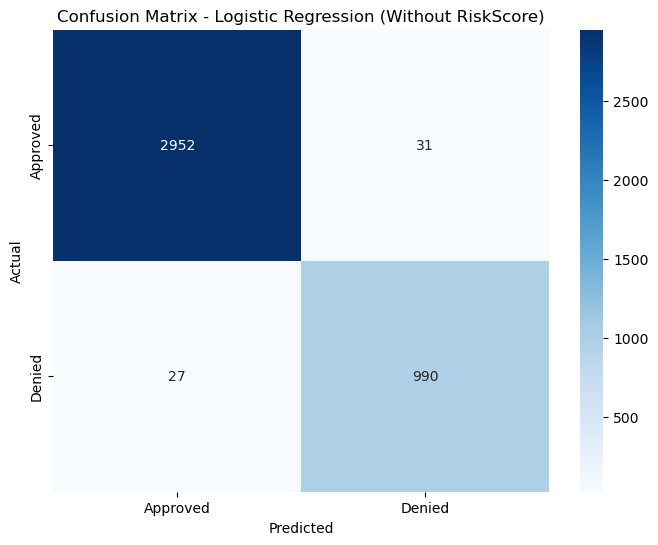

In [ ]:
#best model is logistic regression based on no riskscore... plot confusion matrix

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Approved', 'Denied'], 
            yticklabels=['Approved', 'Denied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Without RiskScore)')
plt.show()


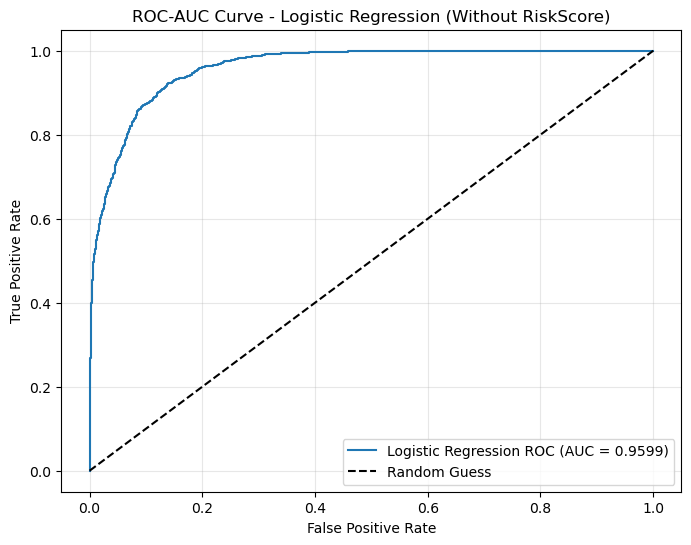

In [ ]:
#ROC-AUC curve logistic regression no riskscore
# Get predicted probabilities for the positive class (Approved)
y_pred_proba_log_no_risk = log_reg_no_risk.predict_proba(X_test_processed_two)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_no_risk)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Logistic Regression (Without RiskScore)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


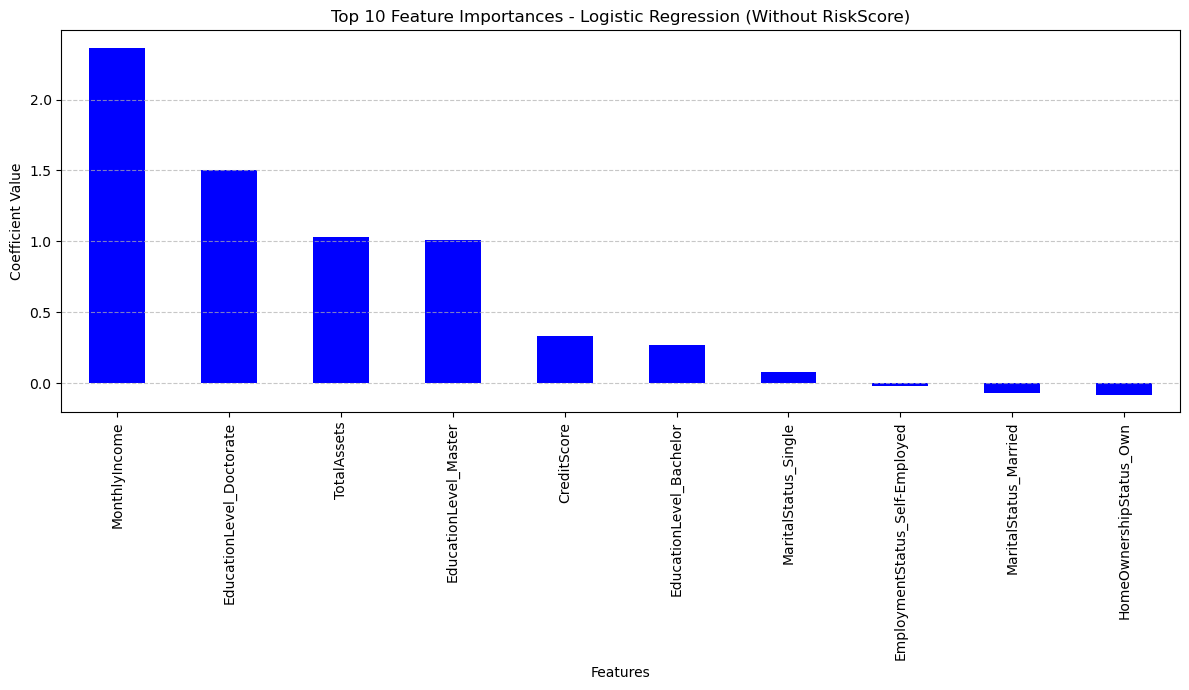

In [ ]:
#importance for no risk
#prompt chatgpt: why is my code not working for feature importance for logistic regression. can you show me the code?

# Extract coefficients
feature_importance = log_reg_no_risk.coef_[0]

# Create a Series for plotting
importances = pd.Series(feature_importance, index=all_features)
importances = importances.sort_values(ascending=False)

# Display top 10 features
top_10_features = importances.head(10)

# Plot
plt.figure(figsize=(12, 7))
top_10_features.plot(kind='bar', color='blue')
plt.title('Top 10 Feature Importances - Logistic Regression (Without RiskScore)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments 
- Identify potential biases or limitations 

Potential bias (discussed throughout) lies in the RiskScore variable. I am limited by my lack of understanding into how this number is calculated. I also feel that the model is missing some real world scenarios. 

One place where our model or data might be limited is the number of borrowers. The dataset treats each loan application as a single entity. Often times it is not just one borrower that is applying for a loan but multiple. The strength of an application can increase with the number of borrowers. It is a key piece of informatin that we do not have. As such, maybe having information like "Number of Borrowers", Combined Income", or "Co-Borrower Credit Score" could help to alleviate this.

- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?

Per the feature importance, the following features had the highest importance score: RiskScore, TotalDebtToIncomeRatio(I will refer to this as DTI moving forward), and BankruptcyHistory_Yes

If excluding RiskScore: MonthlyIncome, EducationLevel_Docterate, TotalAssets are the top 3.

- Does this lead to any potential business recommendations?

RiskScore seems to be a dominant indicator within the model. I do have some concern about data leakage. I also am not sure exactly how RiskScore is calculated. I have been a loan officer for the past 5-6 years and never once have I evaluated a potential client on a "risk score". As such, I would urge our company (Fintech Innovations) to take a strong look at what this is and how it is calculated to make sure that 1) it is a robust number and 2) it is not causing any unintentional bias.

DTI is, according to our model, the second most important feature. This lines up with my expectations as when I am approving a loan, if I see a DTI of, for example, 60%, I know that the loan is unlikely to be approved. It is tough to ask clients to control this. When they are applying for a mortgage (home purchase/refinance/HELOC), their income and their monthly debts are pretty set in stone. Yes, you can pay down credit cards, pay off some loans or revolving credit, but often times the client is unable to do that as however much money they have is being set aside for closing costs and down payment. Perhaps offering interest rate incentives or some sort of closing cost credit if a client has a low DTI would be effective.

Self employment being the third most important feature is an interesting one and something that is, from experience, difficult to control. Self employment income is calculated off of tax returns as opposed to W-2's. There also alternative loan programs that you can be approved on (Non-Qualified Mortgages) with programs such as profit and loss statements, Debt Service Coverage Ratio loans, and bank statement loans. As such, if the goal is to avoid potential defaults, I would avoid lending on these types of products and be very strict with my analysis of self employed borrower's income.

UPDATED AFTER running model without RiskScore:

With RiskScore included, the model performs exceptionally well! It achieves a near perfect recall, F1, and AUC. This means that, as stated, it is a highly influential predictor in loan approvals. However, without RiskScore, the XGBoost model's performance declines substantially, with recall dropping from 0.99 to 0.6155 and F1 score from 0.99 to 0.6731. AUC also dropped from 0.9998 to 0.9086, which while still strong again shows how dominant RiskScore is in the model. This aligns with my initial statement above.

The decline in model performance after removing RiskScore indicates how impactful that feature is on the model. However, without further insight into what it is/how it is calculated, we cannot know if this is something that we can rely on.

When running Logistic Regression without RiskScore (and adding in TotalAssets and MonthlyIncome) the model's performance still declined substantially from the original final model, with recall dropping from 0.99 to 0.7384 and F1 score from 0.99 to 0.7847. AUC also dropped from 0.9998 to 0.9599, which while still strong again shows how dominant RiskScore is in the model. This aligns with my initial statement above that RiskScore is a dominant factor.

From a business perspective, reliance on using RiskScore poses some risk. If Risk comes from anything that would be redlining (discrimination on loaction, age, ethnicity, etc), it could be introducing bias. Also, the concern that a single feature has so much influence might make the model subject to bias therefore reducing the effectiveness of the model. We could be looking at financial repercussions and damage to reputation. While not exactly in the lending world, I recall after 2008, AIG had to rebrand to VALIC due to their role in the economic collapse. People were not using their products. It could happen to Fintech Innovations if something was found discriminatory.

10. Prepare your final deliverable:
- Technical notebook with complete analysis 
- Executive summary for business stakeholders


Creating a predictive model for loan approavls using the "financial_loan_data" dataset has revealed that RiskScore and DTI are the strongest predictors of a customer defaulting on thier loan, with each loan carrying a cost of $50,000/defaulted loan. The XGBoost model preformed excellently with an AUC of 0.9998 which indicates a mimimal risk of false positive approvals or missed opportunities (each costing $8,000). RiskScore is very dominant and as such one business reccomendation would be to audit the RiskScore calculation (check to see how important this is, how it is calculated, etc). Additionally, as DTI is important (second most important feature) a reccomendation would be to offer debt management incentives (such as closing cost credits or interest rate credits). Lastly, as self employment offers risk, I would suggest creating more stringent lending requirements for self employmed borrowers.

With RiskScore included, the model performs exceptionally well! It achieves a near perfect recall, F1, and AUC. This means that, as stated, it is a highly influential predictor in loan approvals. However, without RiskScore, the model's performance declines substantially, with recall dropping from 0.99 to 0.6155 and F1 score from 0.99 to 0.6731. AUC also dropped from 0.9998 to 0.9086, which while still strong again shows how dominant RiskScore is in the model.

UPDATED AFTER Re-Training without RiskScore(I am doing this so you see my thought process)
I re-tested the model removing RiskScore and including TotalAssets and MonthlyIncome. There was some improvement from the initial drop off!
Recall without RiskScore: 0.7434
F1 Score without RiskScore: 0.7718
AUC without RiskScore: 0.9521

This indicates that they are valuable predictors; likely grabbing some financial data that RiskScore was capturing to make predictions.

The best preforming model without RiskScore became the Logistic Regression Model as it has a good recall, F1, cost, and AUC:

Logistic Regression - Recall: 0.7384
Logistic Regression - F1 Score: 0.7847
Logistic Regression - AUC: 0.9599
Total Cost: $9454000

However, if hte goal is to mimize cost, the SVC model has the lowest cost. IF we are trying to maximize recall, XGBoost is the best. 

Based on the dataset and analysis conducted below, it is clear that RiskScore is the key driver of the models performance. However, I do not have specific information into how it is calculated to determine if it includes data leakage or bias. As such, I would proceed with caution with regards to using RiskScore as it may artificially inflate model performance. I would need to find out more information into how it is calculated to determine how to best proceed. 

- Recommendations for implementation

1) Have the company take a good hard look at RiskScore and analyze it.
2) Offcer incenives for lower DTI ratios such as credit for closing costs or downpayments (Lender Credits)
3) Avoid lending on Non-QM products as they inherently pose a huge risk and have stricter overlays (outside of what Fannie/Freddie require) for self employed income calculation. This might be requiring 2 years of taxes as opposed to one, etc. (I am thinking about this analysis for my capstone) 

One additional piece of information I want to include here is the cost of each model:
Logistic Regression Total Cost: $1,766,000

Decision Tree Total Cost: $1,352,000

Random Forest Total Cost: $1,190,000

XGBoost Total Cost: $606,000

SVC Total Cost: $1,540,000

The XGBoost model has far and away the lowest cost potentially lost associated with it due to the lowest number of false positive and false negatives.

If we are looking no risk, the regression model is best. 

SVC No Risk Total Cost: $9,340,000

Random Forest No Risk Total Cost: $9,812,000

Decision Tree No Risk Total Cost: $17,834,000

Logistic Regression No Risk Total Cost: $9,428,000

XGBoost No Risk Total Cost: $11,388,000

- Documentation of potential improvements

Some potential improvements could be the following:
1) Again (reiterating the importance), to audit RiskScore... how it is calculated (ie what variables contribute to it)? This is potentially a major bias within the model. I looked at this through additional testing.
2) Look at some other potential data sources (like length of credit history and UtilityBillPaymentHistory). These are both variables that could indicate a strong or weak borrower
3) Potential feature engineering opportunities... look at TotalDebtToIncomeRatio and RiskScore or EmploymentStatus and EducationLevel to assess income stability
4) Reducing the number of estimators to lower computational time
